In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from astropy.io import fits

from funcs.pipe import read_lc_from_pipe


In [47]:
# GET THE IMAGE DATA -----------------------------------------------------------
file = "visit_1001"

lc1 = read_lc_from_pipe(file, outdata="00000")
lc2 = read_lc_from_pipe(file, outdata="00002")


Imagette file found for visit_1001:
 ../data/hip67522/CHEOPS-products-visit_1001/Outdata/00000/hip67522_CHEOPS-products-visit_1001_im.fits

Imagette file found for visit_1001:
 ../data/hip67522/CHEOPS-products-visit_1001/Outdata/00002/hip67522_CHEOPS-products-visit_1001_im.fits



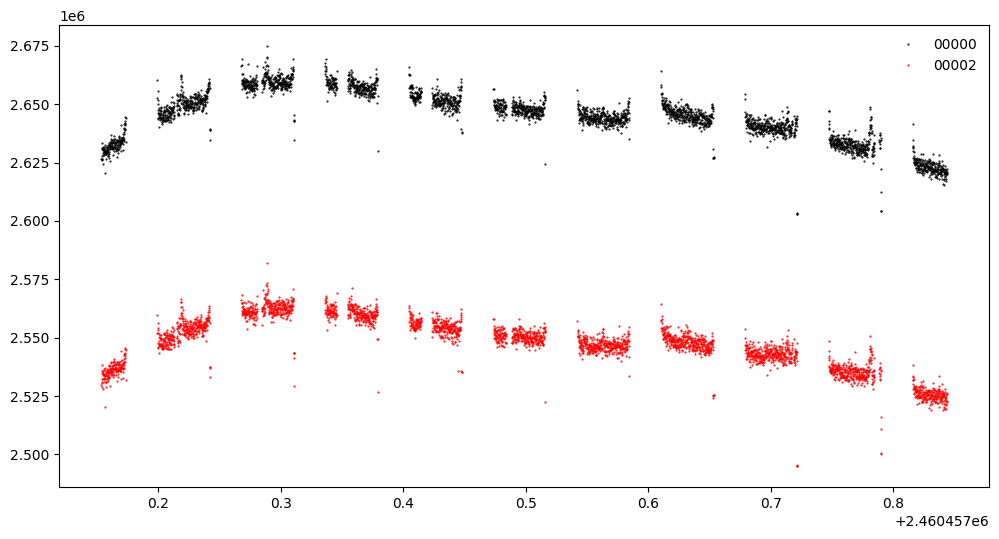

In [48]:
# make a figure comparing the two light curves
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(lc1["t"], lc1["f"] + 0.1e6, "k.", label="00000", markersize=1)
ax.plot(lc2["t"], lc2["f"], "r.", label="00002", markersize=1)

plt.legend(frameon=False)

(20.0, 50.0)

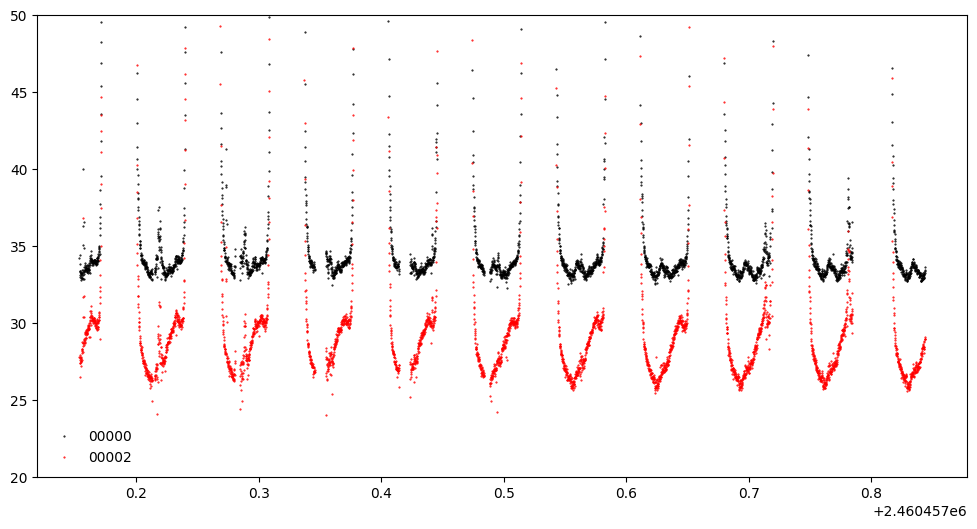

In [49]:
# make a figure comparing the two backgrounds
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(lc1["t"], lc1["bg"] + 5, "k.", label="00000", markersize=1)
ax.plot(lc2["t"], lc2["bg"], "r.", label="00002", markersize=1)

plt.legend(frameon=False)
plt.ylim(20,50)

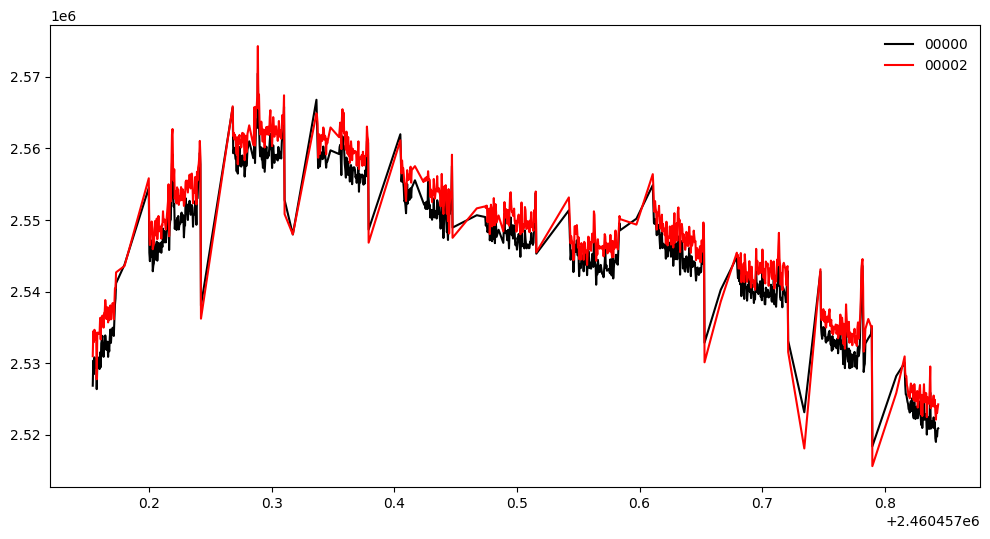

In [50]:
# bin the f array with 30 second bin, i.e. 3 point at a time
f1 = lc1["f"]
f2 = lc2["f"]
t1 = lc1["t"]
t2 = lc2["t"]

n = 4

f1b = np.nanmean(f1.reshape(-1, n), axis=1)
f2b = np.nanmean(f2.reshape(-1, n), axis=1)
t1b = np.nanmean(t1.reshape(-1, n), axis=1)
t2b = np.nanmean(t2.reshape(-1, n), axis=1)

# make a figure comparing the two light curves
fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(t1b, f1b, "k", label="00000", markersize=1)
ax.plot(t2b, f2b, "r", label="00002", markersize=1)

plt.legend(frameon=False)

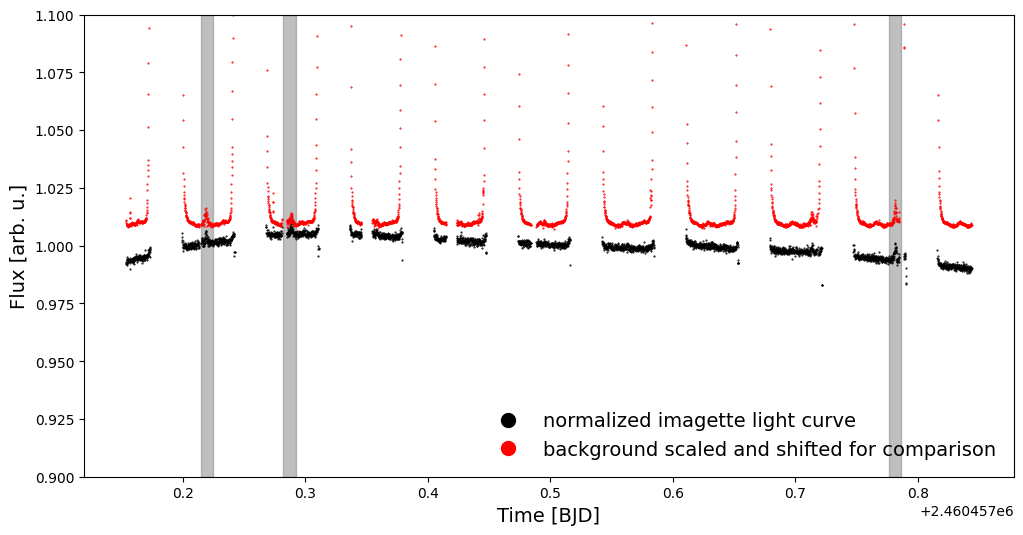

In [71]:
# find when the flux and the background follow the same trend in each light curve

bg1 = lc1["bg"]

f1norm, bg1norm = f1/np.nanmedian(f1b), bg1/np.nanmedian(bg1)/20 + 1

# bg1norm[bg1norm > 1.08] = np.nan

fig, ax = plt.subplots(1, 1, figsize=(12, 6))

ax.plot(t1, f1norm, "k.", label="normalized imagette light curve", markersize=1)
ax.plot(t1, bg1norm - 0.04, "r.", label="background scaled and shifted for comparison", markersize=1)

plt.legend(frameon=False, fontsize=14, markerscale=20)

plt.ylim(0.9, 1.1)

t0 = 2460457
plt.axvspan(t0+0.215, t0+0.225, color="gray", alpha=0.5)
plt.axvspan(t0+0.282, t0+0.292, color="gray", alpha=0.5)
plt.axvspan(t0+0.776, t0+0.786, color="gray", alpha=0.5)

plt.xlabel("Time [BJD]", fontsize=14)
plt.ylabel("Flux [arb. u.]", fontsize=14)

plt.savefig(f"../plots/{file}/comparing_bg_and_flux_00000.png")

In [52]:
# identify slope inversion points in bg1norm and f1norm
# find the slope of the two curves
# first, 

